<a href="https://colab.research.google.com/github/SS2803/Titanic-Survivor-Prediction/blob/main/Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [ ]:
titanic= pd.read_csv("titanic.csv")

In [ ]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
titanic.shape

(1309, 14)

In [ ]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<Axes: xlabel='survived', ylabel='count'>

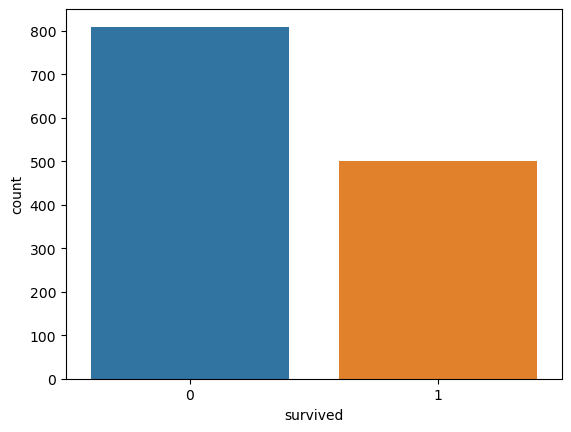

In [ ]:
sns.countplot(x="survived", data=titanic)

<Axes: xlabel='survived', ylabel='count'>

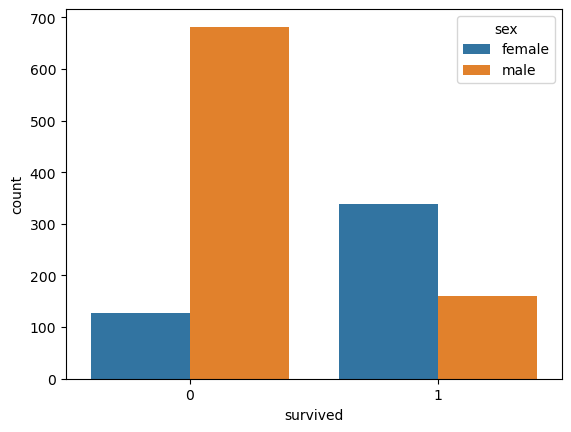

In [ ]:
sns.countplot(x='survived', hue = 'sex', data=titanic)

<Axes: xlabel='survived', ylabel='count'>

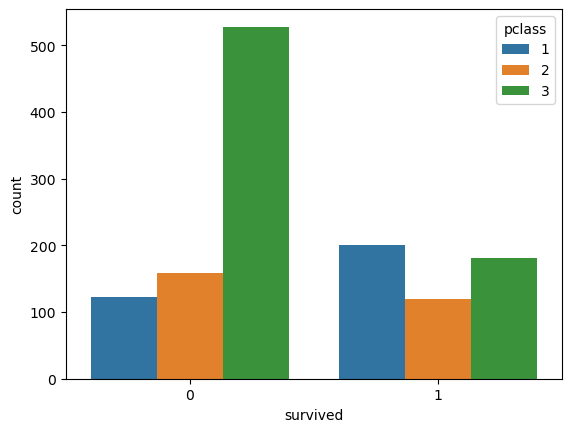

In [ ]:
sns.countplot(x='survived', hue = 'pclass', data=titanic)

Text(0.5, 1.0, 'Age vs Survived')

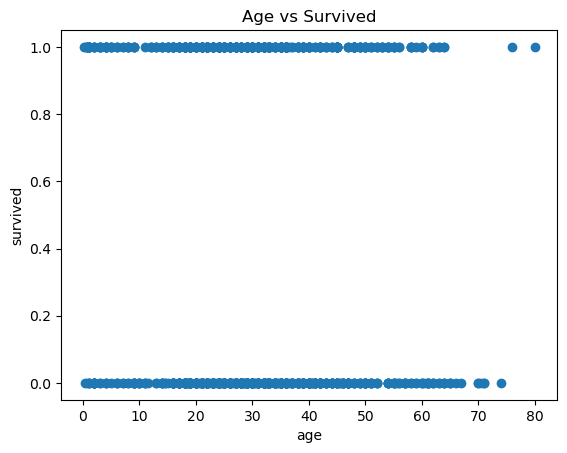

In [ ]:
plt.scatter(titanic['age'], titanic['survived'])
plt.xlabel('age')
plt.ylabel('survived')
plt.title("Age vs Survived")

In [ ]:
titanic.isnull().values.any()

True

In [ ]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
titanic=titanic.drop(['cabin','boat','body','name','ticket','home.dest'], axis=1)

In [ ]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [ ]:
titanic['age']=titanic['age'].fillna(value=titanic['age'].mean())

In [ ]:
titanic['fare']=titanic['fare'].fillna(value=titanic['fare'].mean())

In [ ]:
titanic['embarked'].fillna('S', inplace= True)

In [ ]:
titanic.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [ ]:
titanic.dtypes

pclass        int64
survived      int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [ ]:
sex=pd.get_dummies(titanic['sex'],drop_first=True)

In [ ]:
sex.head(4)

,male
0,0
1,1
2,0
3,1


In [ ]:
embarked=pd.get_dummies(titanic['embarked'], drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [ ]:
titanic=titanic.drop(['sex','embarked'],axis=1)

In [ ]:
titanic=pd.concat([titanic,sex,embarked], axis=1)

In [ ]:
titanic.head()

,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,1,1,29.0000,0,0,211.3375,0,0,1
1,1,1,0.9167,1,2,151.5500,1,0,1
2,1,0,2.0000,1,2,151.5500,0,0,1
3,1,0,30.0000,1,2,151.5500,1,0,1
4,1,0,25.0000,1,2,151.5500,0,0,1


In [ ]:
titanic.isnull().values.any()

False

In [ ]:
x=titanic.drop(['survived'],axis=1)
y=titanic['survived']

In [ ]:
x

,pclass,age,sibsp,parch,fare,male,Q,S
0,1,29.000000,0,0,211.3375,0,0,1
1,1,0.916700,1,2,151.5500,1,0,1
2,1,2.000000,1,2,151.5500,0,0,1
3,1,30.000000,1,2,151.5500,1,0,1
4,1,25.000000,1,2,151.5500,0,0,1
...,...,...,...,...,...,...,...,...
1304,3,14.500000,1,0,14.4542,0,0,0
1305,3,29.881135,1,0,14.4542,0,0,0
1306,3,26.500000,0,0,7.2250,1,0,0
1307,3,27.000000,0,0,7.2250,1,0,0


In [ ]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lgr=LogisticRegression(max_iter=1000)
lgr.fit(x_train, y_train)
y_pred=lgr.predict(x_test)
acc_lgr=round(accuracy_score(y_pred,y_test),2)*100
print("Accuracy: ", acc_lgr)

Accuracy:  81.0


# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
acc_svc=round(accuracy_score(y_pred,y_test),2)*100
print("Accuracy: ", acc_svc)

Accuracy:  67.0


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisiontree=DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred=decisiontree.predict(x_test)
acc_decisiontree=round(accuracy_score(y_pred,y_test),2)*100
print("Accuracy: ", acc_decisiontree)

Accuracy:  74.0


# ------------XXXXXX--------------